In [198]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

In [84]:
df=pd.read_csv('D:\data science diploma\projects\supermarket analysis\supermarket_sales - Sheet1.csv')

In [85]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [87]:
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace(' ','_')
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

In [99]:
df['date'] = pd.to_datetime(df['date']).dt.normalize()
df['date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [89]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [91]:
df['hour']=pd.to_datetime(df['time']).dt.hour
df['hour']

C:\Users\MichaelM\AppData\Local\Temp\ipykernel_6844\1282888947.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: hour, Length: 1000, dtype: int32

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [109]:
df.describe(include=[np.number])


,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating,year,month,hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,2019.0,1.993000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.0,0.835254,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,2019.0,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,2019.0,1.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2019.0,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,2019.0,3.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,2019.0,3.000000,20.000000


In [112]:
cat_columns=df.select_dtypes(include='O')
cat_columns

,invoice_id,branch,city,customer_type,gender,product_line,time,payment
date,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,13:08,Ewallet
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,10:29,Cash
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,13:23,Credit card
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,20:33,Ewallet
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,10:37,Ewallet
...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,13:46,Ewallet
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,17:16,Ewallet
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,13:22,Cash


In [113]:
for col in cat_columns:
    print(f'the number of unique values for the {col} column is {df[col].nunique()}')
    print(f'the unique values for the {col} column is {df[col].unique()}')
    print(' ')
    print(50 * '*')
    col

    

the number of unique values for the invoice_id column is 1000
the unique values for the invoice_id column is ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-22

In [117]:
#number of total sales in each branch
fig = px.pie(df , names=df['branch'], values=df['total'], title='number of total sales in each branch')
fig.show()

In [130]:
#the rate for each branch
fig=px.box(df,'branch','rating')
fig.show()

In [131]:
fig=px.violin(df,'branch','rating')
fig.show()

In [132]:
import plotly.graph_objects as go

fig1 = px.strip(df, x='branch', y='rating')
fig2 = px.box(df,  x='branch', y='rating')
go.Figure(
    fig1.data + fig2.data
)

In [147]:
fig=px.histogram(df,'rating')
fig.show()

In [151]:
numuric_col=df.select_dtypes(include=np.number)
numuric_col.corr()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating,year,month,hour
unit_price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,NaN,-0.027387,0.008242
quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,NaN,-0.014524,-0.007317
tax_5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002770
total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002770
gross_margin_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002770
rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,NaN,-0.042880,-0.030588
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,NaN,1.000000,0.043762


In [227]:
corr=df.corr(numeric_only=True)
corr

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating,year,month,hour
unit_price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,NaN,-0.027387,0.008242
quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,NaN,-0.014524,-0.007317
tax_5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002770
total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002770
gross_margin_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002770
rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,NaN,-0.042880,-0.030588
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,NaN,1.000000,0.043762


In [248]:
px.imshow(corr, text_auto=True, width=1000,height=900)

In [164]:
dff=df.groupby(['product_line','branch'])['total'].sum().reset_index()
dff

,product_line,branch,total
0,Electronic accessories,A,18317.1135
1,Electronic accessories,B,17051.4435
2,Electronic accessories,C,18968.9745
3,Fashion accessories,A,16332.5085
4,Fashion accessories,B,16413.3165
5,Fashion accessories,C,21560.0700
6,Food and beverages,A,17163.1005
7,Food and beverages,B,15214.8885
8,Food and beverages,C,23766.8550
9,Health and beauty,A,12597.7530


In [277]:
px.bar(dff,x='product_line',y='total',color='branch', title='total per product line by branch')


In [173]:
dfff=df.groupby(['hour','branch'])['total'].sum().reset_index()
dfff


,hour,branch,total
0,10,A,11208.4140
1,10,B,8865.8430
2,10,C,11347.2240
3,11,A,11349.8910
4,11,B,10481.8140
5,11,C,8545.6245
6,12,A,9485.0700
7,12,B,8475.4110
8,12,C,8105.4015
9,13,A,10443.7515


In [276]:
fig=px.line(dfff,'hour','total',color='branch',title='total per hour by branch')
fig.update_xaxes(
    tick0=1,
    dtick=1
)
fig.show()

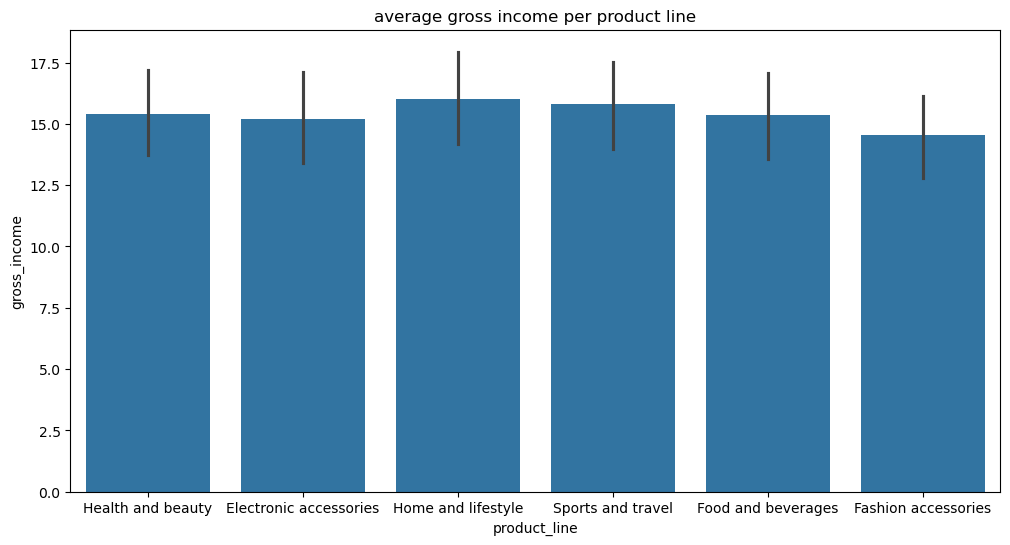

In [249]:
plt.figure(figsize=(12,6))
sns.barplot(df, x='product_line',y='gross_income' )
plt.title('average gross income per product line')
plt.show()

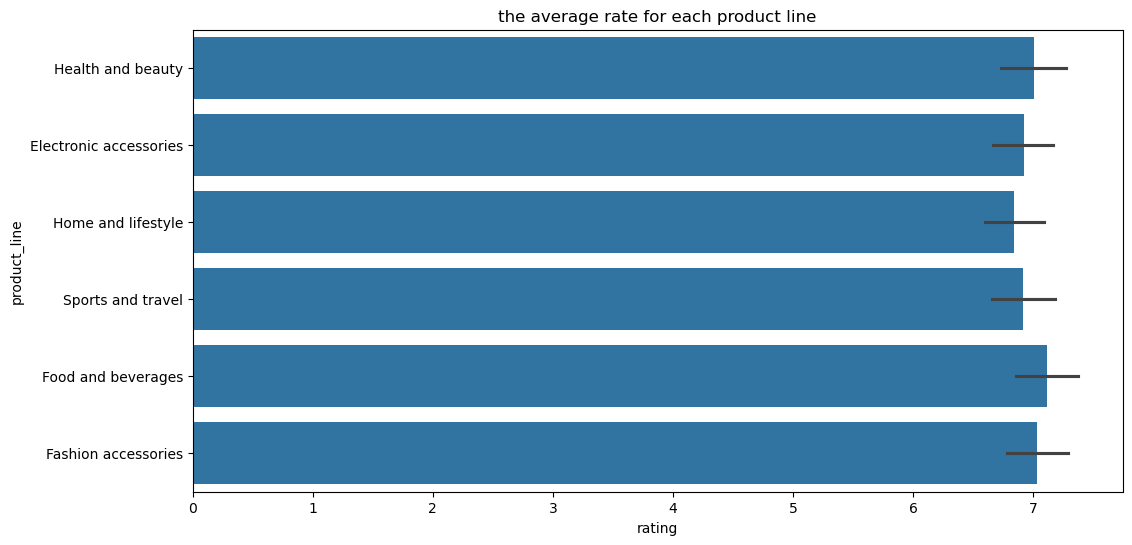

In [225]:
plt.figure(figsize=(12,6))
sns.barplot(df,x='rating',y='product_line')
plt.title("the average rate for each product line" )
plt.show()

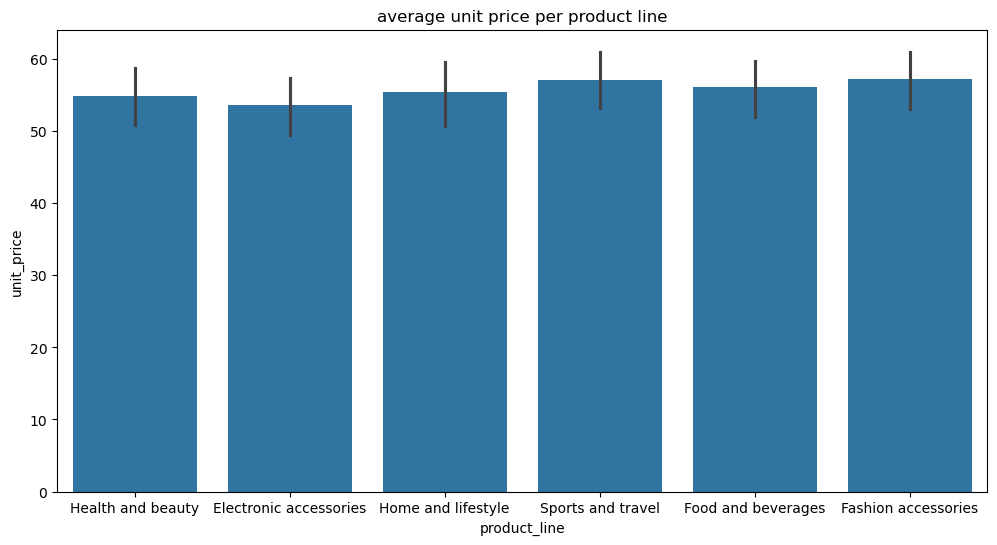

In [250]:
plt.figure(figsize=(12,6))
sns.barplot(df,x='product_line',y='unit_price')
plt.title('average unit price per product line')
plt.show()

In [ ]:
gender_payment=df.groupby(['gender','payment'])['total'].count().reset_index()
gender_payment

,gender,payment,total
0,Female,Cash,178
1,Female,Credit card,163
2,Female,Ewallet,160
3,Male,Cash,166
4,Male,Credit card,148
5,Male,Ewallet,185


In [ ]:
px.bar(gender_payment,x='payment',y='total',color='gender',title='Count of Total Payment Method by Gender')


In [ ]:
branch_payment=df.groupby(['branch','payment'])['total'].count().reset_index()
branch_payment

,branch,payment,total
0,A,Cash,110
1,A,Credit card,104
2,A,Ewallet,126
3,B,Cash,110
4,B,Credit card,109
5,B,Ewallet,113
6,C,Cash,124
7,C,Credit card,98
8,C,Ewallet,106


In [273]:
px.bar(branch_payment,x='payment',y='total',color='branch',title='Count of Total Payment Method by branch')


In [275]:
px.pie(df, values='quantity', names='product_line',title='total quantity sold by product line')

In [281]:
dffff=df.groupby(['customer_type','branch','gender'])['total'].sum().reset_index()
dffff


,customer_type,branch,gender,total
0,Member,A,Female,26643.0675
1,Member,A,Male,26994.4080
2,Member,B,Female,26850.4320
3,Member,B,Male,26854.2540
4,Member,C,Female,34653.4440
5,Member,C,Male,22227.8385
6,Normal,A,Female,26626.0995
7,Normal,A,Male,25936.7955
8,Normal,B,Female,26077.8630
9,Normal,B,Male,26415.1230


In [286]:
px.bar(dffff,'branch','total',color='gender',facet_col='customer_type',text='total',title='total by branch, gender and customer type')

In [288]:
px.scatter( df,x='total',y='rating',color='gender',symbol='branch',title=' Total vs Rating by gender and branch')